In [1]:
import numpy as np
import matplotlib.pyplot as plt
import saqqara
from simulator import LISA_AET

/Users/james/Code/mambaforge/envs/saqqara-3.11/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
config = saqqara.load_settings("default_config.yaml")

In [3]:
config

{'model': {'name': 'noise_variation',
  'fmin': 3e-05,
  'fmax': 0.5,
  'deltaf': 1e-06,
  'ngrid': 1000,
  'noise_approx': False},
 'priors': {'amp': [-13.0, -8.0],
  'tilt': [-5.0, 5.0],
  'TM': [0.0, 6.0],
  'OMS': [0.0, 30.0]},
 'run': {'verbose': False, 'simulate': False, 'train': False, 'infer': False},
 'simulate': {'store_name': 'data_store',
  'store_size': 100000,
  'chunk_size': 500},
 'train': {'trainer_dir': 'training_dir',
  'train_fraction': 0.85,
  'train_batch_size': 2048,
  'val_batch_size': 2048,
  'num_workers': 0,
  'device': 'cpu',
  'n_devices': 1,
  'min_epochs': 1,
  'max_epochs': 100,
  'early_stopping_patience': 7,
  'learning_rate': 7e-05,
  'num_features': 3},
 'infer': {'prior_samples': 100000, 'observation': 'None'}}

In [4]:
sim = LISA_AET(config)

In [5]:
sim.graph.nodes.keys()
shapes, dtypes = sim.get_shapes_and_dtypes()
print(shapes)

/Users/james/Code/public_releases/saqqara/examples/noise_variation/simulator.py:294: ComplexWarning: Casting complex values to real discards the imaginary part
  out[i, j] = np.mean(


{'z': (4,), 'quadratic_signal_AET': (499971, 3, 3), 'quadratic_TM_AET': (499971, 3, 3), 'quadratic_OMS_AET': (499971, 3, 3), 'quadratic_noise_AET': (499971, 3, 3), 'quadratic_data_AET': (499971, 3), 'coarse_grained_data': (944, 3)}


In [6]:
response_AET = np.array(
    [
        sim.AA_interpolator(
            sim.coarse_grained_f[:-1] + np.diff(sim.coarse_grained_f) / 2
        ),
        sim.EE_interpolator(
            sim.coarse_grained_f[:-1] + np.diff(sim.coarse_grained_f) / 2
        ),
        sim.TT_interpolator(
            sim.coarse_grained_f[:-1] + np.diff(sim.coarse_grained_f) / 2
        ),
    ]
).T

/Users/james/Code/mambaforge/envs/saqqara-3.11/lib/python3.11/site-packages/swyft/lightning/utils.py:398: RuntimeWarning: overflow encountered in cast
  x = np.float32(x)
/Users/james/Code/mambaforge/envs/saqqara-3.11/lib/python3.11/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/Users/james/Code/mambaforge/envs/saqqara-3.11/lib/python3.11/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)


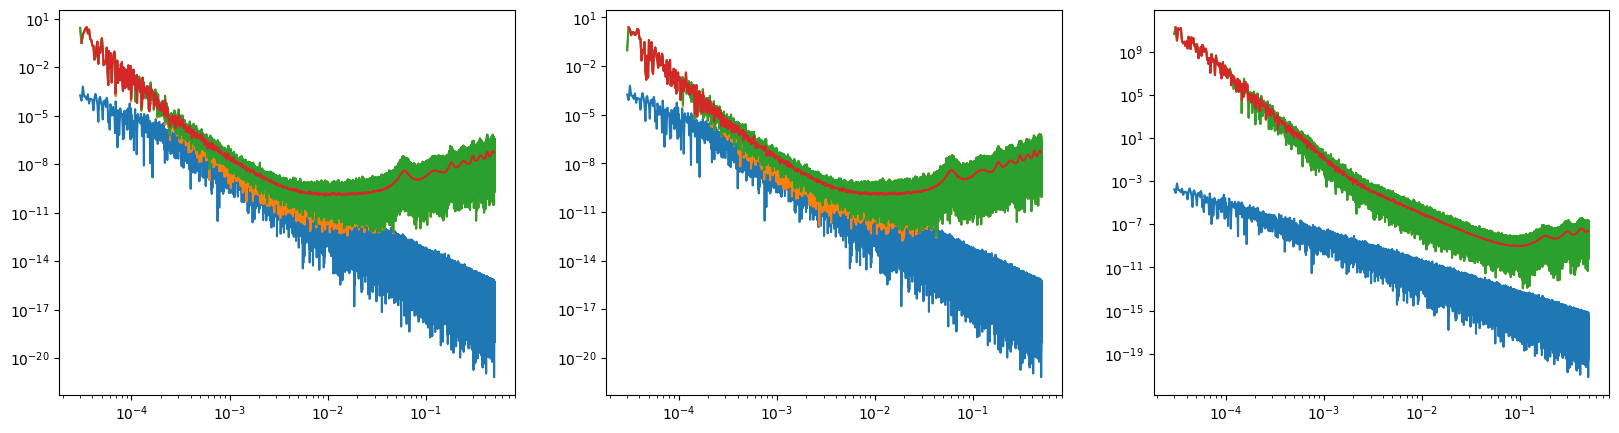

In [7]:
sample = sim.sample(conditions={"z": np.array([-11.0, 0.0, 3.0, 15.0])})
fig = plt.figure(figsize=(20, 5))
for i in range(3):
    ax = plt.subplot(1, 3, i + 1)
    plt.loglog(
        sim.f_vec, sample["quadratic_signal_AET"][:, i, i] / sim.response_AET[:, i]
    )
    plt.loglog(
        sim.f_vec, sample["quadratic_noise_AET"][:, i, i] / sim.response_AET[:, i]
    )
    plt.loglog(sim.f_vec, sample["quadratic_data_AET"][:, i] / sim.response_AET[:, i])
    plt.loglog(
        sim.coarse_grained_f[:-1] + np.diff(sim.coarse_grained_f) / 2,
        sample["coarse_grained_data"][:, i],
    )